In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, copy, os, shutil
from tqdm.notebook import tqdm
from IPython.display import clear_output

# load in our logs file
logs = pd.read_csv("aggregate_logs_v3.csv")

In [3]:
# what are the variables governing our environment? also variables governing our model, and universal hparams
env_params = ["PS", "PW", "MM", "theta", 
              "t-color-p","t-color-c", "t-in", "t-out"]
model_params = ["IM", "NC", "K", "p-shuf"]
uni_params = ["eps", "a", "g"]
nuisance_params = ["max-iters", "seed"]
metric_params = ["num_episodes", "mean_total_reward", "mean_steps_river", "mean_path_length",
                 "mean_wallclock_time", "mean20_total_reward", "mean20_steps_river",
                 "mean20_path_length", "mean20_wallclock_time"]

# we're only concerned with the mean over seeds
logs = logs.groupby(env_params + model_params + uni_params, dropna=False).mean().reset_index()

# Exploring role of epsilon-greedy vs greedy

In [4]:
#group by everything except epsilon, this also has the multiple trials in there not averaged...
sublogs = logs.groupby(env_params + model_params + ["a","g"], dropna = False, as_index = False) #as_index = False ensures keep these columns in data frame
def get_epsilon_values(group, var):
    eps_value_1 = group.loc[group['eps'] == .05, var].iloc[0]
    eps_value_0 = group.loc[group['eps'] == 0, var].iloc[0]
    return pd.Series({'eps_value_1': eps_value_1, 'eps_value_0': eps_value_0})  # Return a Series

result1 = sublogs.apply(get_epsilon_values, include_groups = False, var = "mean_path_length")
result2 = sublogs.apply(get_epsilon_values, include_groups = False, var = "mean_steps_river")
result3 = sublogs.apply(get_epsilon_values, include_groups = False, var = "mean_total_reward")

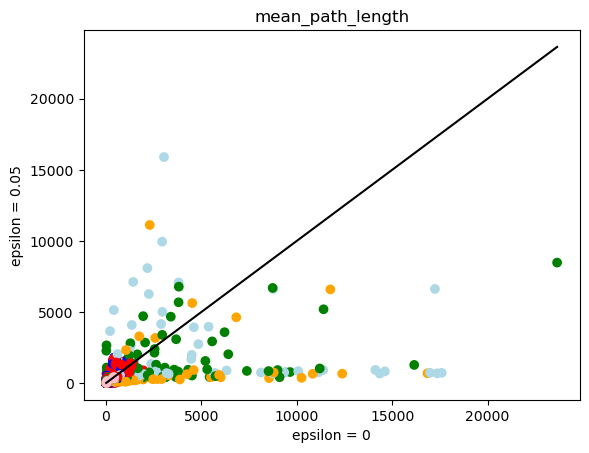

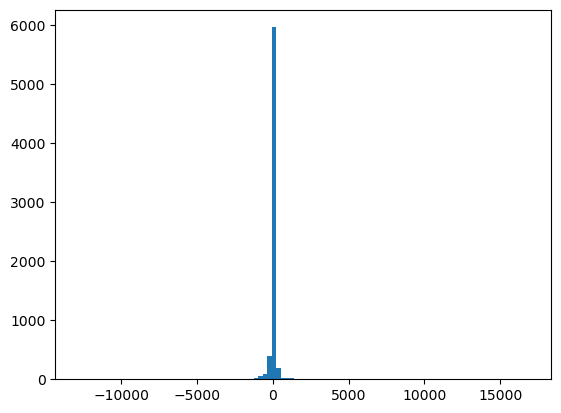

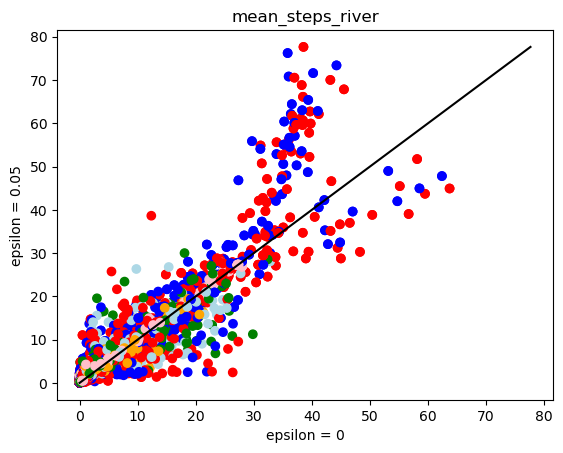

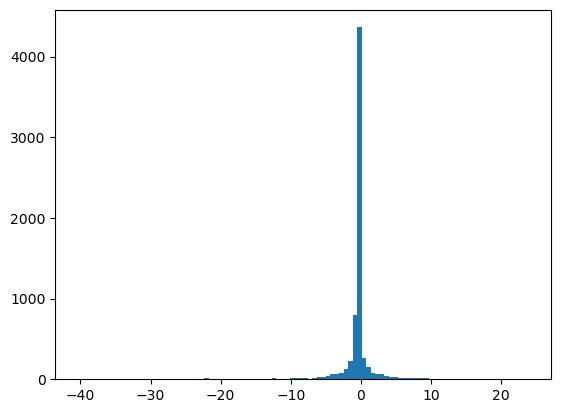

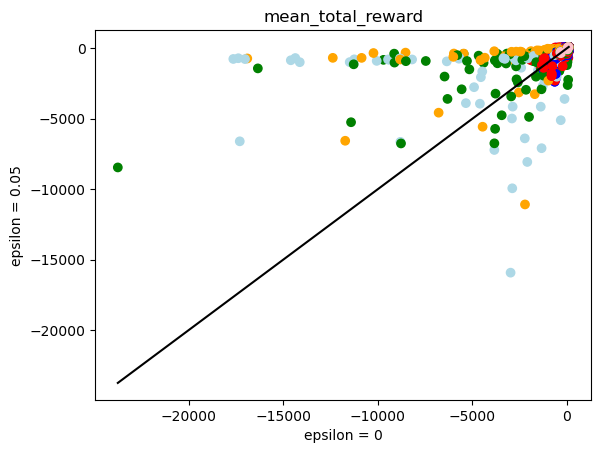

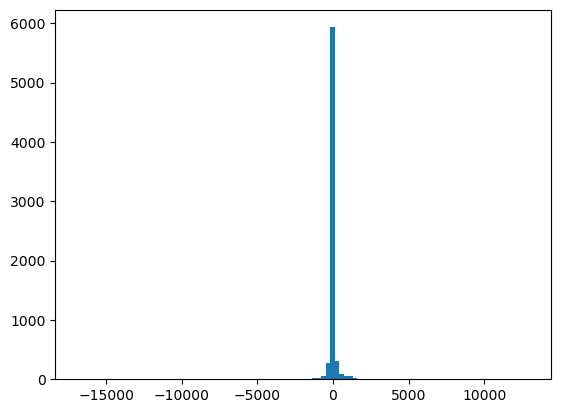

In [9]:
color_map = {'joint':"blue",
             'joint-conservative':"red", 
             'last-fobs1':"lightblue",
             'last-fobs2':"orange",
             'missing-state':"green",
             'random-action':"pink"}

for result, var in zip([result1, result2, result3], ["mean_path_length", "mean_steps_river","mean_total_reward"]):

    #result = result[result['IM'] == "joint"]
    
    colors = result['IM'].map(color_map)
    plt.scatter(result["eps_value_0"],
                result["eps_value_1"],
               color = colors)

    
    plt.xlabel("epsilon = 0")
    plt.ylabel("epsilon = 0.05")
    ma = max(max(result["eps_value_0"]), max(result["eps_value_1"]))
    mi = min(min(result["eps_value_0"]), min(result["eps_value_1"]))
    plt.plot([mi, ma], [mi, ma], color = "black") # plots line y = x
    plt.title(var)
    plt.show()

    difs = result["eps_value_0"]-result["eps_value_1"]
    plt.hist(difs, bins = 100)
    plt.show()


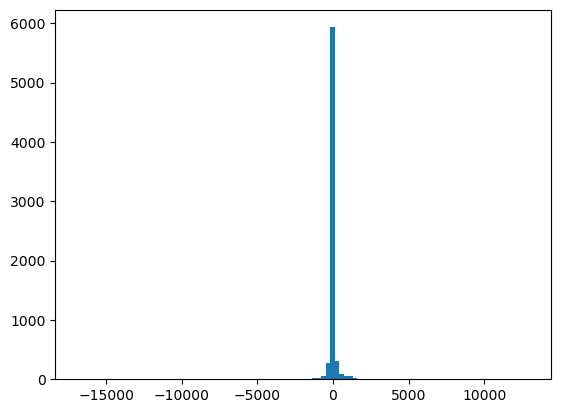